## A Simple Tutorial For using QCAD

In [12]:
from Modules import Module, execute
from Modules import TypicalModule as tm
from Modules.CircuitDrawer import draw

import numpy as np

### 1. Circuit Description
- 이미 정의된 Module을 아래 나열하였습니다.

- tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, tm.MCU

- 이미 정의된 모듈을 재사용하여 새로운 모듈을 정의할 수 있습니다. 이때 모듈의 PORT 순서를 변경할 수 있습니다.

In [13]:
rx_half_pi = tm.RX('RXPI/2', np.pi/2)

custom_u = tm.U('CUSTOMU', 1, [[-1, 0], [0, 1]])

multi_control_h = tm.MCU('CCH', 3, [0, 1], tm.H[2])

In [14]:
SWAP = Module('SWAP', 2, [tm.CX[0, 1],
                         tm.CX[1, 0],
                         tm.CX[0, 1]])

In [15]:
# Controlled Gates

CH = tm.MCU('CH', 2, [0], tm.H[1])
CS = tm.MCU('CS', 2, [0], tm.S[1])
CT = tm.MCU('CT', 2, [0], tm.T[1])

# Module Fourier3

F3 = Module('F3', 3, [tm.H[0],
                      CS[1, 0],
                      CT[2, 0],
                      tm.H[1],
                      CS[2, 1],
                      tm.H[2],
                      SWAP[0, 2]])

In [16]:
# Module Quantum Circuit

CSWAP = tm.MCU('CSWAP', 3, [0], SWAP[1, 2])

QC = Module('QC', 5, [F3[0, 2, 4],
                      CSWAP[4, 0, 2],
                      tm.MCU('MCF3', 5, [0, 1], F3[2, 3, 4])[0, 1, 2, 3, 4]])

In [17]:
QC.show()

# Module Decomposition

# for _temp_module, _temp_reg_index in zip(*QC.typ_decompose()):
#     print('-'*80)
#     _temp_module.show()
#     print(f'reg_index     :{_temp_reg_index}')

Name        :QC
N           :5
sub_modules :[<Modules.module.Module object at 0x7efbfed9bc90>, <Modules.module.TypicalModule.MCU object at 0x7efbfed9b790>, <Modules.module.TypicalModule.MCU object at 0x7efbfed9b650>]
reg_indices :[[0, 2, 4], [4, 0, 2], [0, 1, 2, 3, 4]]
typical     :False
contolled   :False


### 2. Simulation of Quantum Circuit with arbitrary initial state

- Quantum Circuit은 사실상 하나의 큰 모듈과 같습니다.
- draw 함수로 circuit을 그릴 수 있습니다.

In [18]:
# draw(QC)
draw(QC, option='decomposed')

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

<IPython.core.display.Image object>

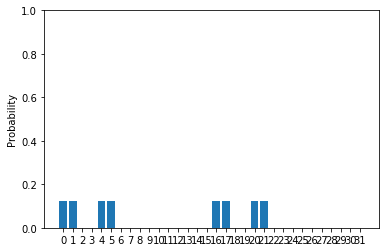

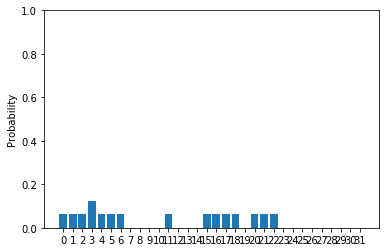

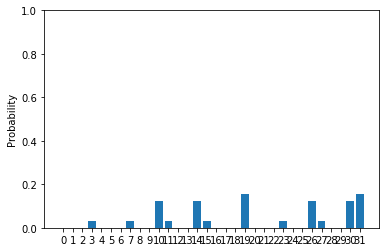

In [19]:
execute('MatrixModel', QC, option='barplot')
execute('MatrixModel', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='barplot')
execute('MatrixModel', QC, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], option='barplot')

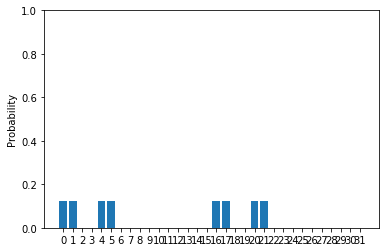

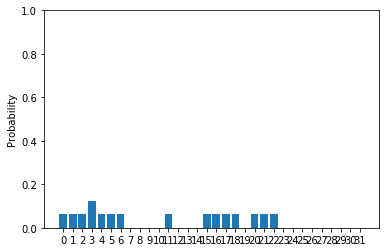

# : State
00011 : (-0.12500000000000003+0.12500000000000003j)
00111 : (-0.12500000000000003+0.12500000000000003j)
01010 : (0.35355339059327384+0j)
01011 : (0.12500000000000003-0.12500000000000003j)
01110 : -0.35355339059327384j
01111 : (0.12500000000000003-0.12500000000000003j)
10011 : (0.3750000000000001-0.12500000000000003j)
10111 : (-0.12500000000000003-0.12500000000000003j)
11010 : (0.25000000000000006-0.25000000000000006j)
11011 : (-0.12500000000000003-0.12500000000000003j)
11110 : (-0.25000000000000006+0.25000000000000006j)
11111 : (-0.12500000000000003+0.3750000000000001j)


In [20]:
execute('Cimulator', QC, option='barplot')
execute('Cimulator', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='barplot')
execute('Cimulator', QC, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], option='nonzero')